In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Iris.csv")
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Normalize the data
df_norm = data[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
90,0.604027,0.333333,0.250000,0.576271,0.458333
0,0.000000,0.222222,0.625000,0.067797,0.041667
63,0.422819,0.500000,0.375000,0.627119,0.541667
43,0.288591,0.194444,0.625000,0.101695,0.208333
144,0.966443,0.666667,0.541667,0.796610,1.000000


In [6]:
df_norm.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.50000,0.428704,0.439167,0.467571,0.457778
std,0.29158,0.230018,0.180664,0.299054,0.317984
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.222222,0.333333,0.101695,0.083333
50%,0.50000,0.416667,0.416667,0.567797,0.500000
75%,0.75000,0.583333,0.541667,0.694915,0.708333
max,1.00000,1.000000,1.000000,1.000000,1.000000


In [8]:
target = data[['Species']].replace(['Setosa','Versicolor','Virginica'],[0,1,2])
target.sample(n=5)

,Species
63,Iris-versicolor
21,Iris-setosa
135,Iris-virginica
118,Iris-virginica
53,Iris-versicolor


In [9]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
125,0.838926,0.805556,0.500000,0.847458,0.708333,Iris-virginica
110,0.738255,0.611111,0.500000,0.694915,0.791667,Iris-virginica
148,0.993289,0.527778,0.583333,0.745763,0.916667,Iris-virginica
36,0.241611,0.333333,0.625000,0.050847,0.041667,Iris-setosa
52,0.348993,0.722222,0.458333,0.661017,0.583333,Iris-versicolor


In [11]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]# taking the training data features
trainY=train.Species# output of our training data
testX= test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # taking test data features
testY =test.Species #output value of test data
trainX.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,0.083333,0.666667,0.000000,0.041667
12,0.138889,0.416667,0.067797,0.000000
127,0.500000,0.416667,0.661017,0.708333
13,0.000000,0.416667,0.016949,0.000000
120,0.722222,0.500000,0.796610,0.916667


In [12]:
trainY.head(5)

22        Iris-setosa
12        Iris-setosa
127    Iris-virginica
13        Iris-setosa
120    Iris-virginica
Name: Species, dtype: object

In [13]:
testX.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
77,0.666667,0.416667,0.677966,0.666667
98,0.222222,0.208333,0.338983,0.416667
52,0.722222,0.458333,0.661017,0.583333
26,0.194444,0.583333,0.101695,0.125000
41,0.055556,0.125000,0.050847,0.083333


In [14]:
testX.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
77,0.666667,0.416667,0.677966,0.666667
98,0.222222,0.208333,0.338983,0.416667
52,0.722222,0.458333,0.661017,0.583333
26,0.194444,0.583333,0.101695,0.125000
41,0.055556,0.125000,0.050847,0.083333


In [15]:
# Solver is the weight optimizer: ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [16]:
clf.fit(trainX, trainY)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [17]:
prediction = clf.predict(testX)
print(prediction)

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica']


In [18]:
print(testY.values)

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica']


In [19]:
from sklearn import metrics

In [20]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.9777777777777777


In [21]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [22]:
clf.fit(trainX, trainY)

C:\Users\anany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [23]:
prediction = clf.predict(testX)
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.4666666666666667


# Using MNIST Dataset

In [24]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
# Cast the records into float values
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
 
# normalize image pixel values by dividing 
# by 255
gray_scale= 255
x_train /= gray_scale
x_test /= gray_scale

In [28]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


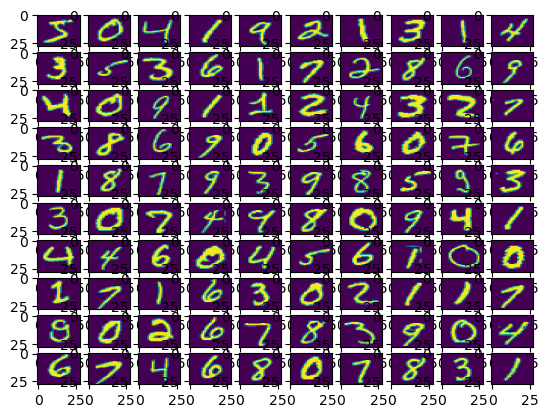

In [29]:
fig, ax= plt.subplots(10, 10)
k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k +=1
plt.show()


In [30]:
model= Sequential([
 
 # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),
 
 # dense layer 1
    Dense(256, activation='sigmoid'), 
 
 # dense layer 2
    Dense(128, activation='sigmoid'), 
 
 # output layer
    Dense(10, activation='sigmoid'), 
])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 3s 59ms/step - loss: 2.1022 - accuracy: 0.3557 - val_loss: 1.7595 - val_accuracy: 0.6495
Epoch 2/10
24/24 [==============================] - 1s 41ms/step - loss: 1.4341 - accuracy: 0.7096 - val_loss: 1.0849 - val_accuracy: 0.8034
Epoch 3/10
24/24 [==============================] - 1s 41ms/step - loss: 0.9108 - accuracy: 0.8134 - val_loss: 0.7086 - val_accuracy: 0.8587
Epoch 4/10
24/24 [==============================] - 1s 43ms/step - loss: 0.6364 - accuracy: 0.8624 - val_loss: 0.5186 - val_accuracy: 0.8874
Epoch 5/10
24/24 [==============================] - 1s 46ms/step - loss: 0.4924 - accuracy: 0.8858 - val_loss: 0.4190 - val_accuracy: 0.9000
Epoch 6/10
24/24 [==============================] - 1s 47ms/step - loss: 0.4137 - accuracy: 0.8963 - val_loss: 0.3634 - val_accuracy: 0.9076
Epoch 7/10
24/24 [==============================] - 1s 52ms/step - loss: 0.3657 - accuracy: 0.9036 - val_loss: 0.3286 - val_accuracy: 0.9134
Epoch 8/10
24

In [33]:
results= model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)

test loss, test acc: [0.2751769423484802, 0.9222999811172485]
